In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pymc as pm
import bambi as bmb
import arviz as az

from statsmodels.formula.api import glm, ols
from sklearn.metrics import mean_squared_error, r2_score
from pymc import Model, Normal, HalfCauchy

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 1 Загрузка и подготовка данных

## 1.1 Загрузка и предварительный анализ данных

In [2]:
sample_sub = pd.read_csv('sample_submission.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train = pd.read_csv('train.csv')

# 2 Обучение моделей

Для анализа работы разных моделей возьмем в качестве предикторов два столбца - год постройки и площадь.

In [5]:
features = ['YearBuilt', 'LotArea']

In [6]:
columns_alias = {}

for i, col in enumerate(features):
    columns_alias[col] = f'X{i+1}'

In [7]:
data = train[features].rename(columns=columns_alias)
data['y'] = train['SalePrice']

In [8]:
data

,X1,X2,y
0,2003,8450,208500
1,1976,9600,181500
2,2001,11250,223500
3,1915,9550,140000
4,2000,14260,250000
...,...,...,...
1455,1999,7917,175000
1456,1978,13175,210000
1457,1941,9042,266500
1458,1950,9717,142125


In [11]:
data.isna().mean()

X1    0.0
X2    0.0
y     0.0
dtype: float64

In [9]:
data.describe()

,X1,X2,y
count,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,180921.195890
std,30.202904,9981.264932,79442.502883
min,1872.000000,1300.000000,34900.000000
25%,1954.000000,7553.500000,129975.000000
50%,1973.000000,9478.500000,163000.000000
75%,2000.000000,11601.500000,214000.000000
max,2010.000000,215245.000000,755000.000000


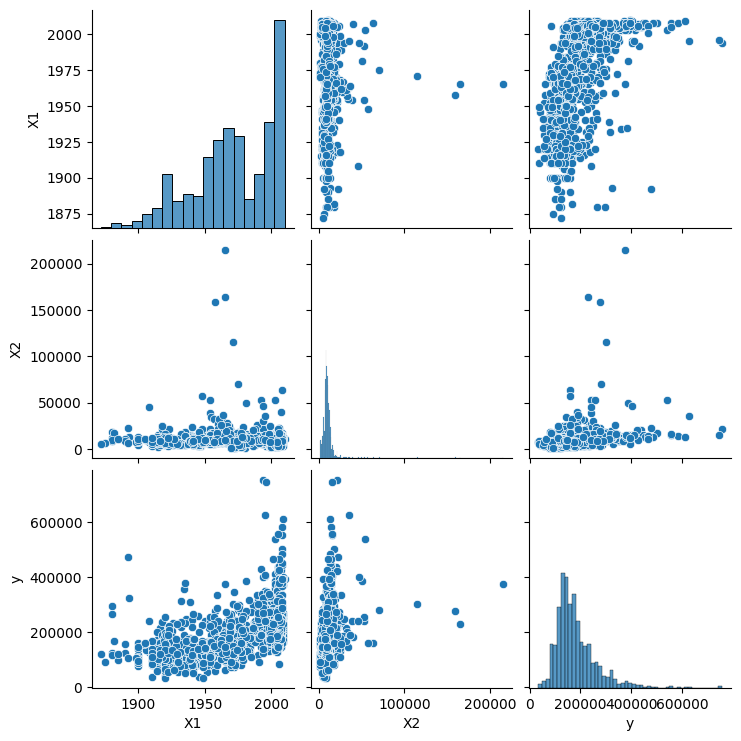

In [10]:
sns.pairplot(data);

In [14]:
X_test = test[features].rename(columns=columns_alias)

In [16]:
formula = 'y ~ ' + ' + '.join(data.drop(columns=['y']).columns.to_list())
formula

'y ~ X1 + X2'

In [17]:
model = bmb.Model(formula, data, family='wald')
idata = model.fit(draws=30, chains=1, tune=3) # sample

Only 30 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pytensor\scalar\basic.py:3233: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pytensor\scalar\basic.py:3233: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pytensor\scalar\basic.py:3233: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pytensor\scalar\basic.py:3233: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pytensor\scalar\basic.py:3233: RuntimeWarning: invalid value encountered in sqrt
  

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'lam_log__': array(-0.72440599), 'Intercept': array(-0.96166719), 'X1': array(0.51542688), 'X2': array(-0.23268617)}

Logp initial evaluation results:
{'lam': -1.39, 'Intercept': -6.01, 'X1': -17.8, 'X2': -431218.44, 'y': -inf}
You can call `model.debug()` for more details.

In [18]:
model = bmb.Model(formula, data, family='gamma')
idata = model.fit(draws=30, chains=1, tune=3) # sample

Only 30 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pytensor\scalar\basic.py:2926: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pytensor\scalar\basic.py:2926: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Demina.LV\Documents\Scripts\OTUS\.venv\Lib\site-packages\pyten

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'alpha_log__': array(0.65719438), 'Intercept': array(-0.13922157), 'X1': array(-0.45275478), 'X2': array(-0.19819166)}

Logp initial evaluation results:
{'alpha': -1.35, 'Intercept': -6.01, 'X1': -13.38, 'X2': -312841.31, 'y': -inf}
You can call `model.debug()` for more details.